In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = "2015-12-24"
end = "2024-12-24"

stock = "bbri.jk"

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK
0,2015-12-28,1349.958130,1355.879044,1299.630762,1302.591218,110588210
1,2015-12-29,1349.958130,1352.918587,1341.076918,1344.037375,64666266
2,2015-12-30,1352.918579,1364.760406,1352.918579,1355.879036,145578164
3,2016-01-04,1358.839478,1373.641602,1326.274692,1349.958107,110418807
4,2016-01-05,1370.681152,1400.285561,1370.681152,1370.681152,118849352
...,...,...,...,...,...,...
2225,2024-12-17,3796.327881,3924.396773,3796.327881,3887.805661,327919000
2226,2024-12-18,3796.327881,3851.214549,3778.032325,3814.623437,205055500
2227,2024-12-19,3741.441162,3759.736718,3704.850050,3741.441162,381986300


In [4]:
ma_100_days = data.Close.rolling(100).mean()

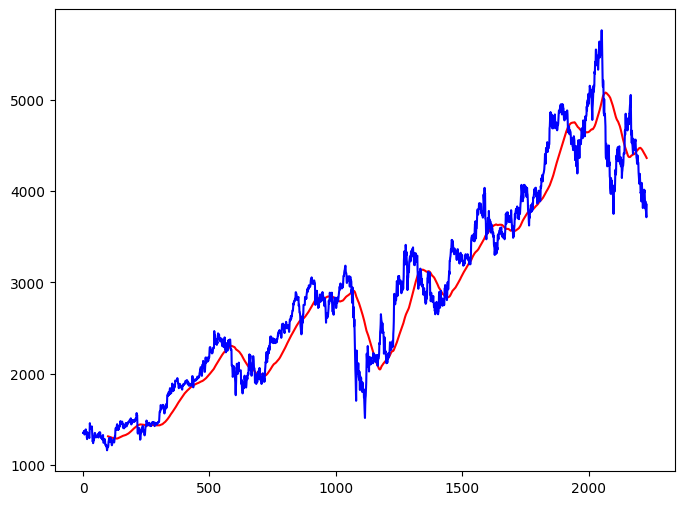

In [5]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'b')
plt.show()

In [6]:
ma_200_days = data.Close.rolling(200).mean()

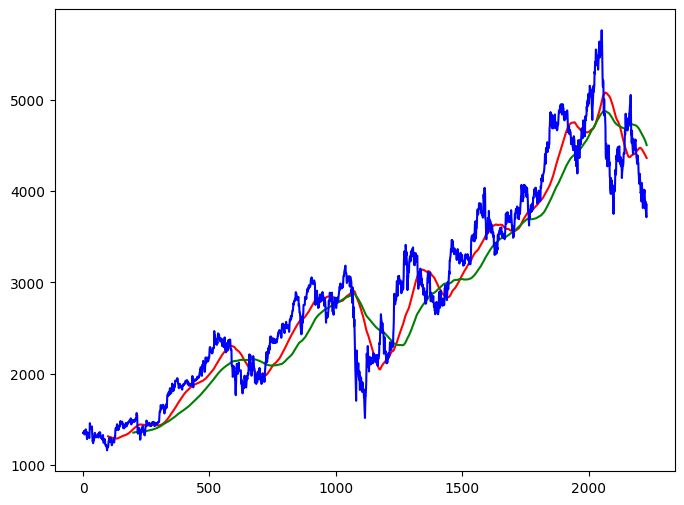

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'g')
plt.plot(data.Close, 'b')
plt.show()

In [8]:
data.dropna(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK
0,2015-12-28,1349.958130,1355.879044,1299.630762,1302.591218,110588210
1,2015-12-29,1349.958130,1352.918587,1341.076918,1344.037375,64666266
2,2015-12-30,1352.918579,1364.760406,1352.918579,1355.879036,145578164
3,2016-01-04,1358.839478,1373.641602,1326.274692,1349.958107,110418807
4,2016-01-05,1370.681152,1400.285561,1370.681152,1370.681152,118849352
...,...,...,...,...,...,...
2225,2024-12-17,3796.327881,3924.396773,3796.327881,3887.805661,327919000
2226,2024-12-18,3796.327881,3851.214549,3778.032325,3814.623437,205055500
2227,2024-12-19,3741.441162,3759.736718,3704.850050,3741.441162,381986300


In [9]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [10]:
data_train.shape[0], data_test.shape[0]

(1784, 446)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
data_training_scaler = scaler.fit_transform(data_train)

In [13]:
x = []
y = []

for i in range(100, data_training_scaler.shape[0]):
  x.append(data_training_scaler[i-100: i])
  y.append(data_training_scaler[i, 0])

In [14]:
x,y = np.array(x), np.array(y)

In [15]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [16]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
model.fit(x,y, epochs = 50, batch_size = 32)

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - loss: 0.1320
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0127
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0119
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0103
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0084
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0085
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0083
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0076
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0081
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0071
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0070
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0070
Epoch 13/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0060
Epoch 14/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0069
Epoch 15/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0071
Ep

In [20]:
pas_100_days = data_train.tail(100)

In [21]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [23]:
data_test_scale = scaler.fit_transform(data_test)

In [24]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100: i])
  y.append(data_test_scale[i, 0])

In [25]:
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step


In [27]:
scale = 1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

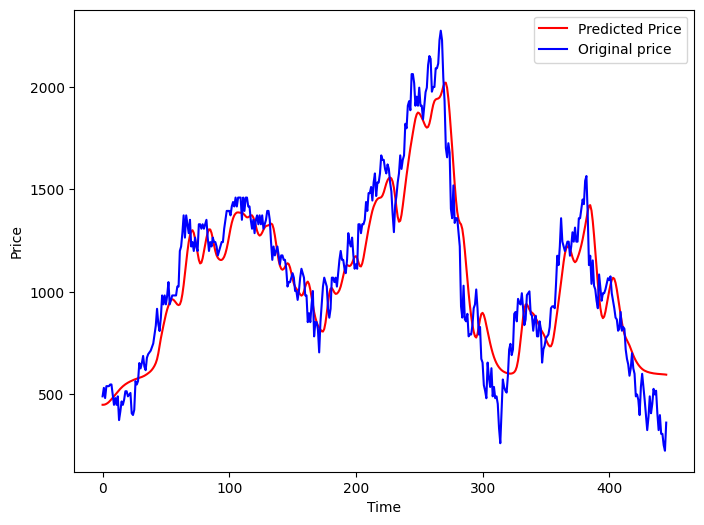

In [30]:
plt.figure(figsize=(8,6))
plt.plot(y_predict, 'r', label = "Predicted Price")
plt.plot(y, 'b', label = "Original price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [35]:
os.mkdir("model")

In [37]:
model.save("model/Stock Predictions Model.keras")

In [40]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
The token `water_gauge_od_read` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `wate

In [41]:
from huggingface_hub import HfApi
import os
api = HfApi(token=os.getenv("HF_TOKEN"))

api.upload_folder(
    folder_path="/content/model",
    repo_id="galang006/stock_market_predict_LSTM",
    repo_type="model",
)

Stock Predictions Model.keras:   0%|          | 0.00/2.20M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/galang006/stock_market_predict_LSTM/commit/afa12f95e1cb8a74fd6cc12a3dce688b63298654', commit_message='Upload folder using huggingface_hub', commit_description='', oid='afa12f95e1cb8a74fd6cc12a3dce688b63298654', pr_url=None, repo_url=RepoUrl('https://huggingface.co/galang006/stock_market_predict_LSTM', endpoint='https://huggingface.co', repo_type='model', repo_id='galang006/stock_market_predict_LSTM'), pr_revision=None, pr_num=None)